<a href="https://colab.research.google.com/github/sonjoy1s/ML/blob/main/sta_M_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.DataFrame({'h':[150,160,170,185,190],
                   'w':[50,58,70,80,90]})
df

,h,w
0,150,50
1,160,58
2,170,70
3,185,80
4,190,90


In [ ]:
#standardization Z score sciling
mean_h=df.mean()
#print(mean_h)
std = df.std()
print(std)
z=(df-mean_h)/std
z.round(2)

h    16.733201
w    16.149303
dtype: float64


,h,w
0,-1.25,-1.21
1,-0.66,-0.72
2,-0.06,0.02
3,0.84,0.64
4,1.14,1.26


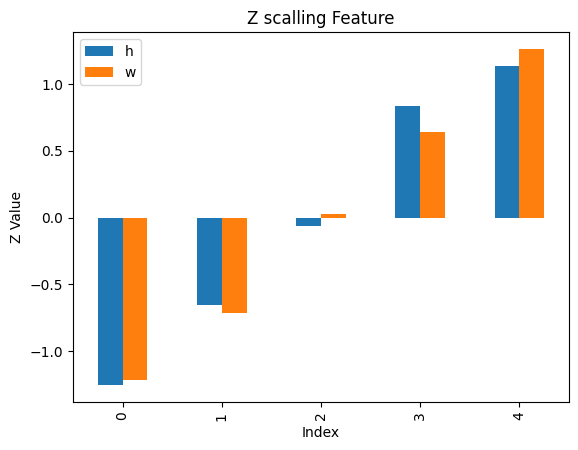

In [ ]:
z.plot(kind='bar')
plt.title('Z scalling Feature')
plt.xlabel('Index')
plt.ylabel('Z Value')
plt.show()

In [ ]:
#min max scaling :
df = pd.DataFrame({'h':[150,175,170,180,190],
                   'w':[50,60,70,80,90]})
df

,h,w
0,150,50
1,175,60
2,170,70
3,180,80
4,190,90


In [ ]:
min = df.min()
max= df.max()
rg = max - min
min,max,rg

(h    150
 w     50
 dtype: int64,
 h    190
 w     90
 dtype: int64,
 h    40
 w    40
 dtype: int64)

In [ ]:
ss = df - min
ss.head()

,h,w
0,0,0
1,25,10
2,20,20
3,30,30
4,40,40


In [ ]:
mm=ss/rg
mm.round(2)

,h,w
0,0.00,0.00
1,0.62,0.25
2,0.50,0.50
3,0.75,0.75
4,1.00,1.00


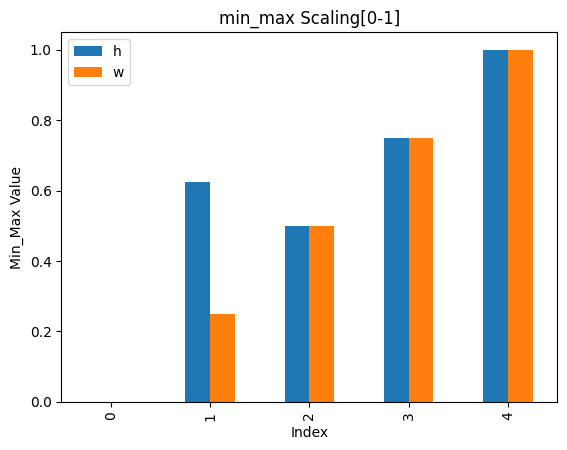

In [ ]:
mm.plot(kind='bar')
plt.title('min_max Scaling[0-1]')
plt.xlabel('Index')
plt.ylabel('Min_Max Value')
plt.show()

In [ ]:
#Robust Scaling  : Formula : x = (x - median)/IQR
df = pd.DataFrame({'h':[150,160,170,180,300],
                   'w':[50,60,70,80,200]})
df

,h,w
0,150,50
1,160,60
2,170,70
3,180,80
4,300,200


In [ ]:
med = df.median()
Q1 = df.quantile(.25)
Q3 = df.quantile(.75)
IQR = Q3 - Q1
x = (df - med)/IQR
x.round(2)

,h,w
0,-1.0,-1.0
1,-0.5,-0.5
2,0.0,0.0
3,0.5,0.5
4,6.5,6.5


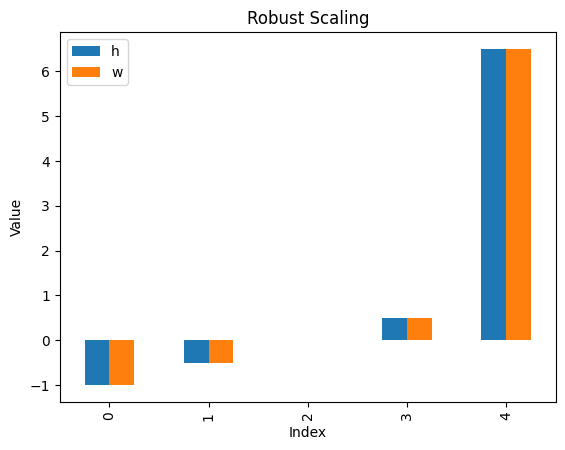

In [ ]:
x.plot(kind='bar')
plt.title('Robust Scaling')
plt.xlabel('Index')
plt.ylabel('Value')
plt.show()

In [ ]:
df=pd.DataFrame({'id':[1,2,3,4],
                 'color':['red','blue','green','red'],
                 'size':['small','medium','large','madium'],
                 'price':[10,12,15,11]})
df

,id,color,size,price
0,1,red,small,10
1,2,blue,medium,12
2,3,green,large,15
3,4,red,madium,11


In [ ]:
#apply one-hot encoding to the color columns
d_color = pd.get_dummies(df['color'],prefix='color',dtype=np.int64)
d_color

,color_blue,color_green,color_red
0,0,0,1
1,1,0,0
2,0,1,0
3,0,0,1


In [ ]:
df_encoded = pd.concat([df,d_color],axis=1)


,id,color,size,price,color_blue,color_green,color_red
0,1,red,small,10,0,0,1
1,2,blue,medium,12,1,0,0
2,3,green,large,15,0,1,0
3,4,red,madium,11,0,0,1


In [ ]:
df_encoded = df_encoded.drop('color',axis=1)
print(df_encoded)

   id    size  price  color_blue  color_green  color_red
0   1   small     10           0            0          1
1   2  medium     12           1            0          0
2   3   large     15           0            1          0
3   4  madium     11           0            0          1


In [ ]:
df=pd.DataFrame({'id':[1,2,3,4],
                 'color':['red','blue','green','red'],
                 'size':['small','medium','large','medium'],
                 'price':[10,12,15,11]})
df

,id,color,size,price
0,1,red,small,10
1,2,blue,medium,12
2,3,green,large,15
3,4,red,medium,11


In [ ]:
order ={'small':1,'medium':2,'large':3}

In [ ]:
df['size']= df['size'].map(order).astype(np.int64)
df

,id,color,size,price
0,1,red,1,10
1,2,blue,2,12
2,3,green,3,15
3,4,red,2,11
